In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for dealing with null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

# Importing The Dataset

In [2]:
df=pd.read_csv('waterpotability.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3267 non-null   float64
 2   Solids           3267 non-null   float64
 3   Chloramines      3267 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3267 non-null   float64
 6   Organic_carbon   3267 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3267 non-null   float64
 9   Potability       3267 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.4 KB


In [3]:
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3013,11.621140,203.730368,15102.237428,7.816415,NaN,447.045213,21.632385,61.801804,3.472067,0
2249,NaN,219.674262,22210.613083,5.875041,NaN,398.517703,11.502316,112.412210,2.994259,0
2891,NaN,220.892705,7460.247260,4.987537,NaN,320.354781,13.114365,40.612909,4.266869,0
2731,6.857494,233.210575,22603.649454,6.627059,368.105783,412.434677,16.926175,62.557900,4.306581,1
1277,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,0


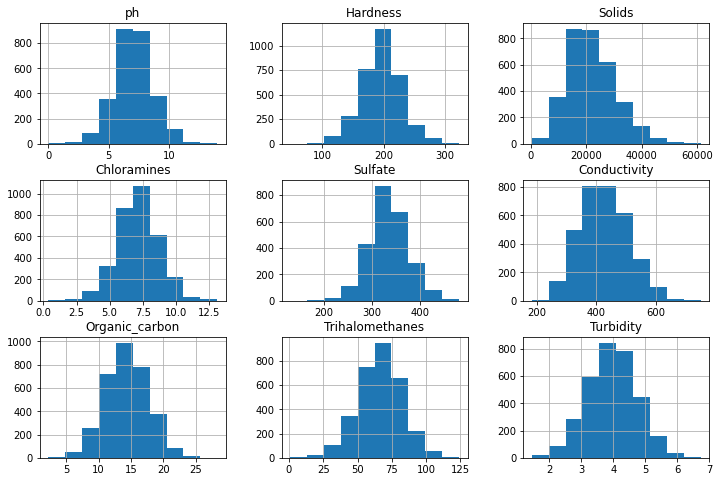

In [4]:
df.drop('Potability', axis=1).hist(figsize=(12,8))
plt.show()

## Visualisations of measures

In [27]:
sns.set_style(style='darkgrid')

### pH of water

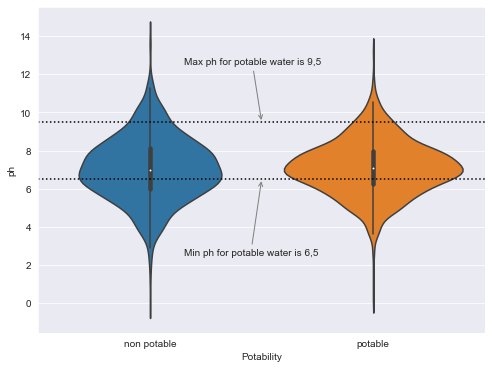

In [95]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='ph', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.axhline(y=9.5, linestyle='dotted', color='black')
ax.axhline(y=6.5, linestyle='dotted', color='black')
ax.annotate('Max ph for potable water is 9,5', xy=[0.5,9.5], 
           xytext=[0.15,12.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
ax.annotate('Min ph for potable water is 6,5', xy=[0.5,6.5], 
           xytext=[0.15,2.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Hardness - Capacity of water to precipitate soap in mg/L

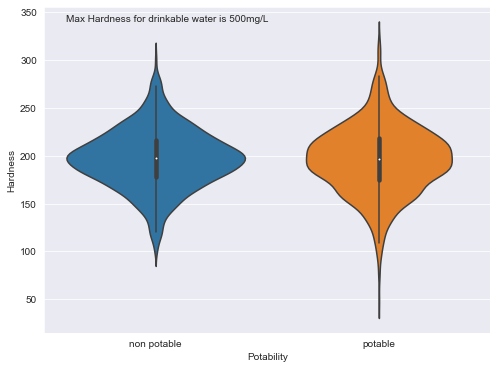

In [96]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Hardness', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.annotate('Max Hardness for drinkable water is 500mg/L', xy=[0.5,350], 
           xytext=[-0.4,340])
plt.show()

### Solids - Total dissolved solids in ppm

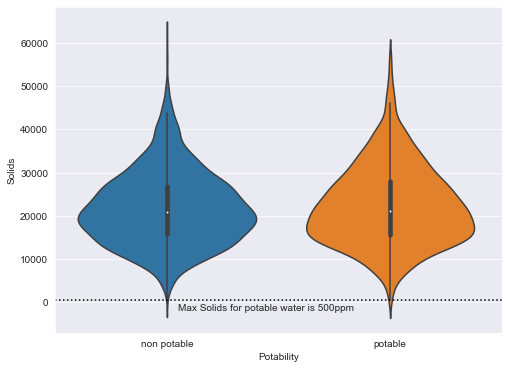

In [97]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Solids', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=500, linestyle='dotted', color='black')
ax.annotate('Max Solids for potable water is 500ppm', xy=[0.5,0], 
           xytext=[0.05,-1800])
plt.show()

### Chloramines - Amount of Chloramines in ppm

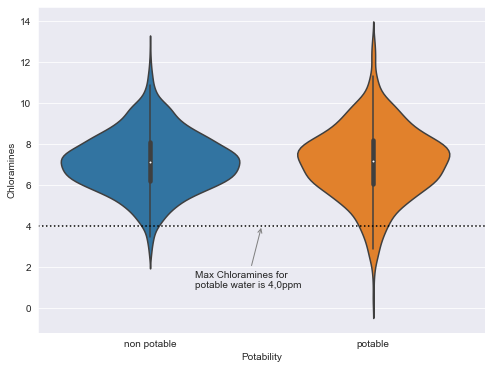

In [98]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Chloramines', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.axhline(y=4, linestyle='dotted', color='black')
ax.annotate('Max Chloramines for \npotable water is 4,0ppm', xy=[0.5,4], 
           xytext=[0.20,1],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Sulfate - Amount of Sulfates dissolved in mg/L

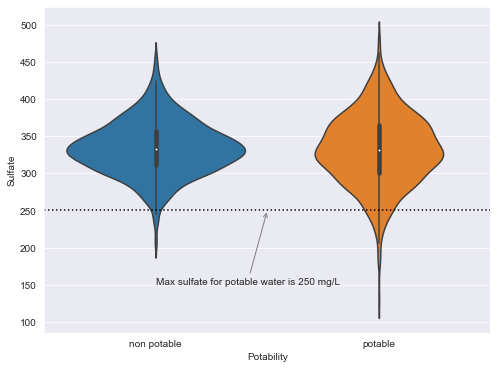

In [99]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Sulfate', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=250, linestyle='dotted', color='black')
ax.annotate('Max sulfate for potable water is 250 mg/L', xy=[0.5,250], 
           xytext=[0,150],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Conductivity - Electrical conductivity of water in μS/cm

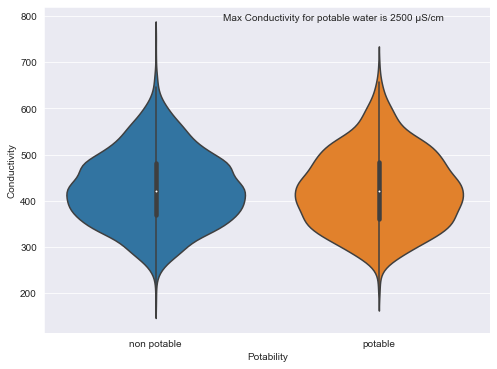

In [100]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Conductivity', data=df)
ax.set(xticklabels=('non potable', 'potable'))
ax.annotate('Max Conductivity for potable water is 2500 μS/cm', xy=[0.4,750], xytext=[0.3,790])
plt.show()

### Organic_carbon - Amount of organic carbon in ppm

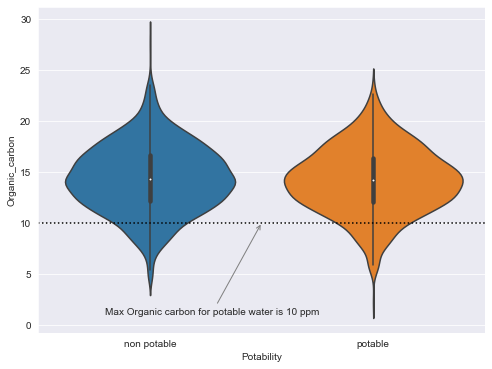

In [101]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Organic_carbon', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=10, linestyle='dotted', color='black')
ax.annotate('Max Organic carbon for potable water is 10 ppm', xy=[0.5,10], 
           xytext=[-0.2,1],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Trihalomethanes - Amount of Trihalomethanes in μg/L

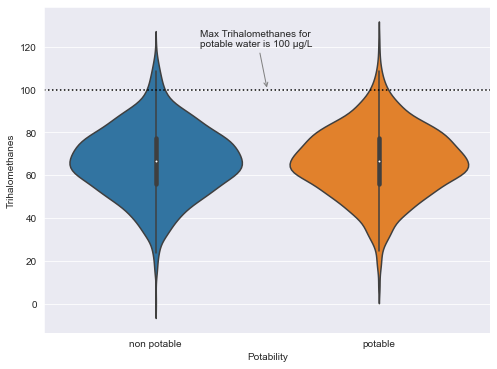

In [102]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Trihalomethanes', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=100, linestyle='dotted', color='black')
ax.annotate('Max Trihalomethanes for \npotable water is 100 μg/L', xy=[0.5,100], 
           xytext=[0.2,120],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

### Turbidity - Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)

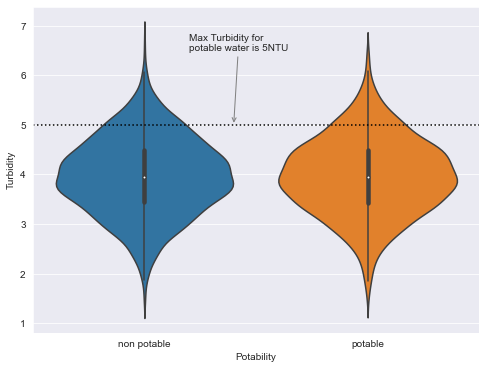

In [103]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x='Potability', y='Turbidity', data=df)
ax.set(xticklabels=('non potable', 'potable'))
plt.axhline(y=5, linestyle='dotted', color='black')
ax.annotate('Max Turbidity for \npotable water is 5NTU', xy=[0.4,5], xytext=[0.2,6.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

#### After checking all measures we can see that most of the measures do not meet the standards

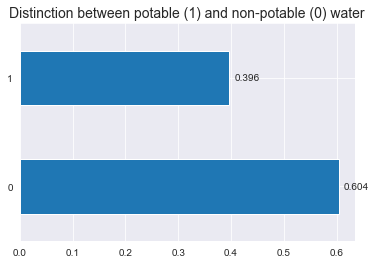

In [130]:
# Create the bar chart with value counts
ax = df['Potability'].value_counts(normalize=True).plot(kind='barh')
plt.title('Distinction between potable (1) and non-potable (0) water', fontsize=14)

# Add the values to the chart
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height()/2, str(round(i.get_width(), 3)), va='center')


plt.show()

# Data Preparation - dealing with missing values

In [46]:
df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate            772
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

In [47]:
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

round(df_imputed, 2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.19,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0.0
1,3.72,129.42,18630.06,6.64,344.84,592.89,15.18,56.33,4.50,0.0
2,8.10,224.24,19909.54,9.28,331.98,418.61,16.87,66.42,3.06,0.0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0.0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0.0
...,...,...,...,...,...,...,...,...,...,...
3262,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1.0
3263,7.81,193.55,17329.80,8.06,338.61,392.45,19.90,66.47,2.80,1.0
3264,9.42,175.76,33155.58,7.35,326.85,432.04,11.04,69.85,3.30,1.0
3265,5.13,230.60,11983.87,6.30,336.99,402.88,11.17,77.49,4.71,1.0


In [48]:
df_imputed.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

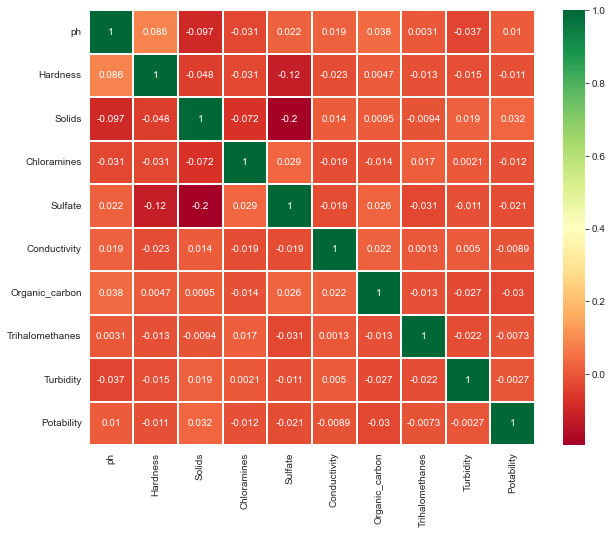

In [49]:
corr=df_imputed.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)
plt.show()

# Standardizing The Data

In [50]:
X = df_imputed.drop('Potability',axis=1)
y = df_imputed['Potability']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling - spot checking

In [55]:
seed = 42
models =[("LR", LogisticRegression(random_state=seed)),("KNN",KNeighborsClassifier()), ("SVM", SVC(random_state=seed)),
         ("XGB", XGBClassifier(random_state=seed)), ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()), 
         ("Ridge", RidgeClassifier(random_state=seed)), ('RF',RandomForestClassifier(random_state=seed)),
         ('ADA',AdaBoostClassifier(random_state=seed)), ("GB",GradientBoostingClassifier(random_state=seed))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults  # Accuracy score

[('SVM', 0.7201834862385321),
 ('GB', 0.6896024464831805),
 ('RF', 0.6850152905198776),
 ('GNB', 0.6712538226299695),
 ('ADA', 0.6651376146788991),
 ('KNN', 0.6467889908256881),
 ('LR', 0.6406727828746177),
 ('Ridge', 0.6406727828746177),
 ('XGB', 0.6376146788990825),
 ('DTC', 0.5764525993883792)]

In [56]:
seed = 42
models =[("LR", LogisticRegression(random_state=seed)),("KNN",KNeighborsClassifier()), ("SVM", SVC(random_state=seed)),
         ("XGB", XGBClassifier(random_state=seed)), ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()), 
         ("Ridge", RidgeClassifier(random_state=seed)), ('RF',RandomForestClassifier(random_state=seed)),
         ('ADA',AdaBoostClassifier(random_state=seed)), ("GB",GradientBoostingClassifier(random_state=seed))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = roc_auc_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults  # ROC AUC score

[('SVM', 0.6392551892551893),
 ('RF', 0.6137667887667888),
 ('GB', 0.606929181929182),
 ('KNN', 0.5925213675213675),
 ('GNB', 0.5888583638583639),
 ('XGB', 0.5882173382173382),
 ('ADA', 0.5755799755799755),
 ('DTC', 0.556990231990232),
 ('LR', 0.4988095238095238),
 ('Ridge', 0.4988095238095238)]

#### I chose the top 3 baseline models and performed Hyperparameter tuning to it.

# Hyperparameter Tuning

### SVM hyperparameters tuning

In [73]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

svm_results_train = svm.predict(X_train)
svm_results_test = svm.predict(X_test)

print('Accuracy score in train set: {:.3f}'.format(accuracy_score(y_train, svm_results_train)))
print('Accuracy score in test set: {:.3f}'.format(accuracy_score(y_test, svm_results_test)))
print('ROC AUC score in train set: {:.3f}'.format(roc_auc_score(y_train, svm_results_train)))
print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, svm_results_test)))

Accuracy score in train set: 0.738
Accuracy score in test set: 0.720
ROC AUC score in train set: 0.689
ROC AUC score in test set: 0.639


In [88]:
confusion_matrix(svm_results_test, y_test)

array([[388, 151],
       [ 32,  83]], dtype=int64)

In [83]:
param_grid_SVM = {'C':[0.3, 0.6, 0.9], 
                  "gamma": [0.1, 0.2, 0.3], 
                  'random_state': [42]
                 }

In [84]:
grid_svm = GridSearchCV(svm, param_grid_SVM, cv=10, n_jobs=-1, scoring = 'accuracy')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.3, 0.6, 0.9], 'gamma': [0.1, 0.2, 0.3],
                         'random_state': [42]},
             scoring='accuracy')

In [85]:
print('Best parameters: {}'.format(grid_svm.best_estimator_))
print('Best score: {}'.format(grid_svm.best_score_))

Best parameters: SVC(C=0.6, gamma=0.2, random_state=42)
Best score: 0.6708929250387529


In [86]:
grid_svm_results_train = grid_svm.best_estimator_.predict(X_train)
grid_svm_results_test = grid_svm.best_estimator_.predict(X_test)

print('Accuracy score in train set: {:.3f}'.format(accuracy_score(y_train, grid_svm_results_train)))
print('Accuracy score in test set: {:.3f}'.format(accuracy_score(y_test, grid_svm_results_test)))
print('ROC AUC score in train set: {:.3f}'.format(roc_auc_score(y_train, grid_svm_results_train)))
print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, grid_svm_results_test)))

Accuracy score in train set: 0.762
Accuracy score in test set: 0.708
ROC AUC score in train set: 0.716
ROC AUC score in test set: 0.626


### GradientBoosting hyperparameters tuning

In [89]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_results_train = gb.predict(X_train)
gb_results_test = gb.predict(X_test)

print('Accuracy score in train set: {:.3f}'.format(accuracy_score(y_train, gb_results_train)))
print('Accuracy score in test set: {:.3f}'.format(accuracy_score(y_test, gb_results_test)))
print('ROC AUC score in train set: {:.3f}'.format(roc_auc_score(y_train, gb_results_train)))
print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, gb_results_test)))

Accuracy score in train set: 0.742
Accuracy score in test set: 0.690
ROC AUC score in train set: 0.691
ROC AUC score in test set: 0.607


In [102]:
confusion_matrix(gb_results_test, y_test)

array([[377, 160],
       [ 43,  74]], dtype=int64)

In [94]:
param_grid_GB = {'learning_rate': [0.005, 0.01, 0.015],
                 'n_estimators': [750, 1000, 1250],
                 'max_depth': [4, 5, 6],
                 'random_state': [42]
                }

In [95]:
grid_GB = GridSearchCV(gb, param_grid_GB, cv=10, n_jobs=-1, scoring = 'accuracy')
grid_GB.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.015],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [750, 1000, 1250],
                         'random_state': [42]},
             scoring='accuracy')

In [96]:
grid_GB.best_estimator_

GradientBoostingClassifier(learning_rate=0.005, max_depth=6, n_estimators=1000,
                           random_state=42)

In [97]:
grid_gb_results_train = grid_GB.best_estimator_.predict(X_train)
grid_gb_results_test = grid_GB.best_estimator_.predict(X_test)

print('Accuracy score in train set: {:.3f}'.format(accuracy_score(y_train, grid_gb_results_train)))
print('Accuracy score in test set: {:.3f}'.format(accuracy_score(y_test, grid_gb_results_test)))
print('ROC AUC score in train set: {:.3f}'.format(roc_auc_score(y_train, grid_gb_results_train)))
print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, grid_gb_results_test)))

Accuracy score in train set: 0.840
Accuracy score in test set: 0.680
ROC AUC score in train set: 0.804
ROC AUC score in test set: 0.599


### Random Forest hyperparameters tuning

In [98]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_results_train = rf.predict(X_train)
rf_results_test = rf.predict(X_test)

print('Accuracy score in train set: {:.3f}'.format(accuracy_score(y_train, rf_results_train)))
print('Accuracy score in test set: {:.3f}'.format(accuracy_score(y_test, rf_results_test)))
print('ROC AUC score in train set: {:.3f}'.format(roc_auc_score(y_train, rf_results_train)))
print('ROC AUC score in test set: {:.3f}'.format(roc_auc_score(y_test, rf_results_test)))

Accuracy score in train set: 1.000
Accuracy score in test set: 0.685
ROC AUC score in train set: 1.000
ROC AUC score in test set: 0.614


In [101]:
confusion_matrix(rf_results_test, y_test)

array([[363, 149],
       [ 57,  85]], dtype=int64)

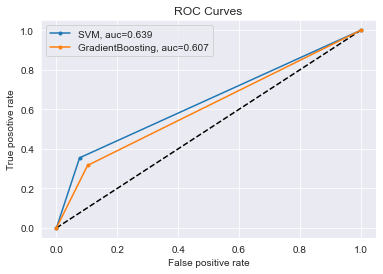

In [109]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, svm_results_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, gb_results_test)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, marker='.', label='SVM, auc='+str(round(roc_auc_score(y_test, svm_results_test),3)))
plt.plot(fpr2, tpr2, marker='.', label='GradientBoosting, auc='+str(round(roc_auc_score(y_test, gb_results_test),3)))
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

## Cross validation

In [112]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [122]:
models = {'RF':RandomForestClassifier(), 'SVM':SVC(), 'GB':GradientBoostingClassifier(), 'KNN':KNeighborsClassifier(),
          'ADA':AdaBoostClassifier(), 'XGB':XGBClassifier(), 'GNB':GaussianNB()}

results_cv = []
for model in models.values():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kf)
    results_cv.append(cv_results)

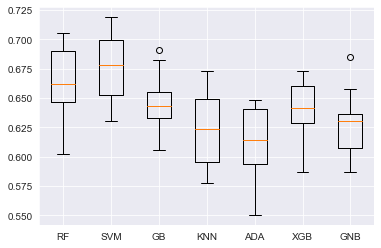

In [123]:
plt.boxplot(results_cv, labels=models.keys())
plt.show()

In [126]:
results_cv = []
for model in models.values():
    skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=skf)
    results_cv.append(cv_results)

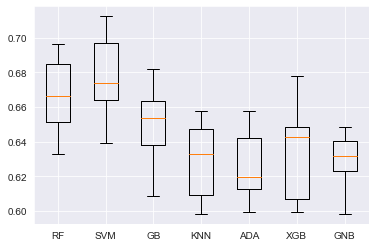

In [127]:
plt.boxplot(results_cv, labels=models.keys())
plt.show()

### Conclusions:

### The characteristics of the water on which the model was based did not allow to achieve good results:

###  1. All the characterics of potable water and non potable were almost the same, eg. mean, min, max

###  2. Only 2,7% of the water samples were safe in terms of Chloramines levels.

###  3. Only 2.3% of the water samples were safe in terms of Sulfate levels.

###  4. The correlation coefficients between the features were very low.

###  5. SVM and GB Classifier worked the best to train the model.